![](https://www.gannett-cdn.com/-mm-/0b146ca359d26300e1d6a8b6a2d86ce731de39c2/c=10-0-630-466/local/-/media/2016/12/10/INGroup/Indianapolis/636169619660823711-121116.jpg?quality=50&width=640)

The spread of misinformation on social media platforms is an ever-growing problem. Organizations, politicians, individuals looking for personal gain and even certain news media outlets engage in propagating fake news to sway people's decisions as well as distorting events to fit a bias or prejudice. 

The degree of authenticity of the news posted online cannot be definitively measured, since the manual classification of news is tedious and time-consuming and is also subject to bias. 

To tackle the growing problem, detection, classification and mitigation tools are a need of the hour.

# Methodology
The categories, bs (i.e. bullshit), junksci(i.e. junk science), hate, fake, conspiracy, bias, satire and state declare the
category under which untrustworthy or false news fall under. 

#OUTLINE FOR THIS PROJECT :
1. IMPORTING DATASET
2. DATA CLEANING
3. EXPLORATORY DATA ANALYSIS
4. DATA PREPROCESSING FOR MODEL
5. BASIC MODEL BUILDING




    **credit to Ruchi Bhatia share the picture

1.Importing Dataset & Libraries
* Importing the nexessary libraries for data processing

In [223]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.core.display import HTML
from pandas import DataFrame 
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import OrderedDict 

from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL


#set for the dataset display for max row and column shown for 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



* Importing the data set


In [224]:
#load dataset
data = pd.read_csv('news_articles.csv')
data

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


2. Data Cleaning

In [225]:
#Start to get more information
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [226]:
# check the missing value on each coloumn  
data.isnull().sum()



author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [227]:
#check any duplicates data or not
data.duplicated().sum()



10

In [228]:
#to check if ther NaN value on the dataframe
#true if column contains NaN values
data.isna().any()

author                     False
published                  False
title                      False
text                        True
language                    True
site_url                    True
main_img_url                True
type                        True
label                       True
title_without_stopwords     True
text_without_stopwords      True
hasImage                    True
dtype: bool

In [229]:
#drop the duplicates
data.drop_duplicates(inplace=True)

In [230]:
#dropping null values
data.dropna(inplace=True)

In [231]:
# Display the data types of our dataset columns
data.dtypes

author                      object
published                   object
title                       object
text                        object
language                    object
site_url                    object
main_img_url                object
type                        object
label                       object
title_without_stopwords     object
text_without_stopwords      object
hasImage                   float64
dtype: object

In [232]:
#to check the values of series object
data['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

These are the 8 different types of articles:

a.bs (i.e. bullshit)

b.junksci(i.e. junk science)

c.hate

d.fake

e.conspiracy

f.bias

g.satire

h.state

3. Exploratory Data Analysis

let's visualize the proportion of real and fake news!

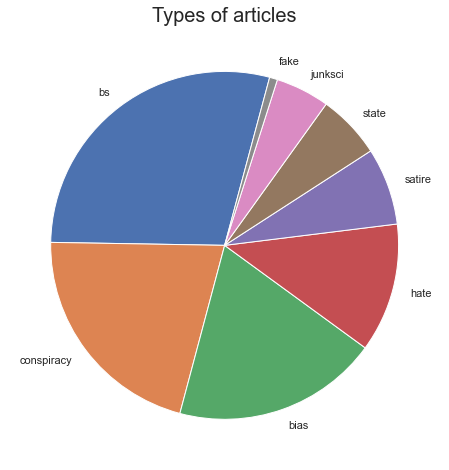

In [233]:
#distribute type of articles
data['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()



In [234]:
#real vs fake
fig = px.pie(data,names='label',title='Proportion of Real vs. Fake News')
fig.show()

Language of News Articles

In [235]:
sub_tf_data=data.groupby('language').apply(lambda x:x['language'].count()).reset_index(name='Counts')
fig = px.bar(sub_tf_data, x="language", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

from above we can see that english are most common language used in articles.

In [236]:
# Visualizing count of news articles by type

sub_check=data.groupby('type').apply(lambda x:x['type'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='type',y='Counts',color='Counts',title='Count of News Articles by type')
fig.show()

From above we can see that type article with bs(i.e.bullshit) and the counts for each type of articles.

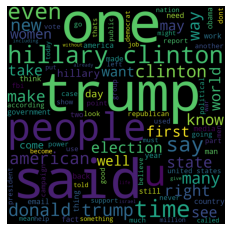

In [237]:
#Check what most word or keyword comes up from articles
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(data['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

We use Unigrams and bigrams to visualise what most keywords or most articles about.

In [238]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [239]:
#Most word used by using unigrams
common_words = get_top_n_words(data['text_without_stopwords'], 20)
df = DataFrame (common_words,columns=['word','count'])
df.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 unigrams used in articles',color='blue')

In [240]:
#Most word used by using bigrams
common_words = get_top_n_bigram(data['text_without_stopwords'], 20)
df = pd.DataFrame(common_words, columns = ['words' ,'count'])
df.groupby('words').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams used in articles', color='blue')

In [241]:
# Articles including images vs Label
fig = px.bar(data, x='hasImage', y='label',title='Articles including images vs Label')
fig.show()

In [242]:
#Define the article that has images
def convert(path):
    return '<img src="'+ path + '" width="80">'

data_sources = data[['site_url','label','main_img_url']]
dataf_r = data_sources.loc[data['label']== 'Real'].iloc[6:10,:]
dataf_f = data_sources.loc[data['label']== 'Fake'].head(10)


In [243]:
# real article
HTML(dataf_r.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
6,100percentfedup.com,Real,
7,100percentfedup.com,Real,
8,100percentfedup.com,Real,
9,100percentfedup.com,Real,


In [244]:
#Hoax article
HTML(dataf_f.to_html(escape=False,formatters=dict(main_img_url=convert)))

,site_url,label,main_img_url
33,21stcenturywire.com,Fake,
34,21stcenturywire.com,Fake,
35,21stcenturywire.com,Fake,
36,21stcenturywire.com,Fake,
37,21stcenturywire.com,Fake,
38,21stcenturywire.com,Fake,
39,21stcenturywire.com,Fake,
40,21stcenturywire.com,Fake,
41,21stcenturywire.com,Fake,
42,21stcenturywire.com,Fake,


Visualizing top 10 authors


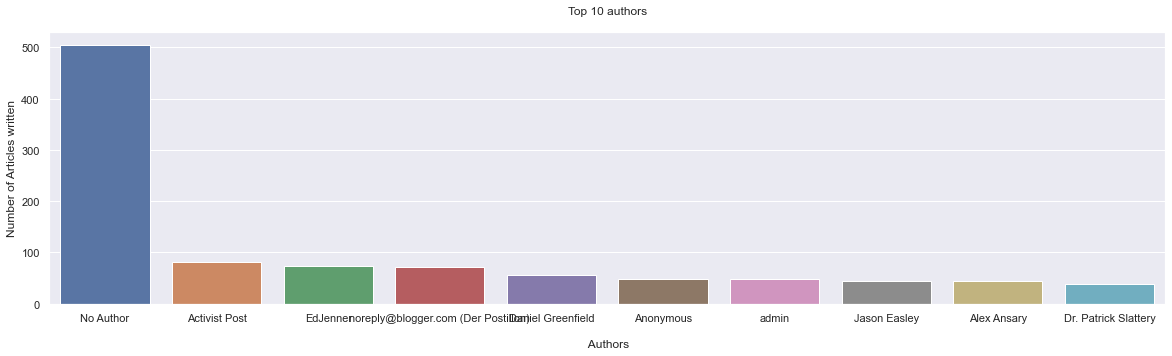

In [245]:
# dataframe with top 10 authors
df1 = data['author'].value_counts().sort_values(ascending=False).head(10)
df1 = pd.DataFrame(df1)
df1 = df1.reset_index() 

# Plotting
sns.set()
plt.figure(figsize=(20,5))
sns.barplot(x='index', y='author', data=df1)
plt.xlabel("\n Authors")
plt.ylabel("Number of Articles written")
plt.title("Top 10 authors\n")
plt.show()

from here we can see that most article no author put or might unrecognise author publish the article.

Now we need to check with the website which one that fake website or trustworthy website

In [246]:
#define all site url
data['site_url'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'abeldanger.net', 'abovetopsecret.com', 'activistpost.com',
       'addictinginfo.org', 'adobochronicles.com', 'ahtribune.com',
       'allnewspipeline.com', 'americannews.com',
       'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com',
       'awdnews.com', 'barenakedislam.com', 'clickhole.com',
       'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org',
       'counterpunch.org', 'dailywire.com', 'darkmoon.me',
       'davidduke.com', 'davidstockmanscontracorner.com',
       'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press',
       'dennismichaellynch.com', 'departed.co', 'der-postillon.com',
       'fromthetrenchesworldreport.com', 'frontpagemag.com',
       'galacticconnection.com', 'globalresearch.ca', 'infowars.com',
       'intrepidreport.com', 'legorafi.fr', 'madworldnews.com',
       'naturalnews.com', 'newstarget.com', 'politicususa.com',
       'presstv.com', 'pre

In [247]:
#create type label for real use 0 and fake 1
type_label = {'Real': 0, 'Fake': 1}
data_sources.label = [type_label[item] for item in data_sources.label] 

In [248]:
#iterate the real and fake 
val_real=[]
val_fake=[]

for i,row in data_sources.iterrows():
    val = row['site_url']
    if row['label'] == 0:
        val_real.append(val)
    elif row['label']== 1:
        val_fake.append(val)

In [249]:
#Websites publishing real news
uniqueValues_real = list(OrderedDict.fromkeys(val_real)) 

print(f"{y_}Websites publishing real news:{g_}{uniqueValues_real}\n") 

Websites publishing real news:['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'davidduke.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'newstarget.com', 'politicususa.com', 'presstv.com', 'presstv.ir', 'prisonplanet.com', 'proudemocrat.com', 'redstatewatcher.com', 'returnofkings.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']



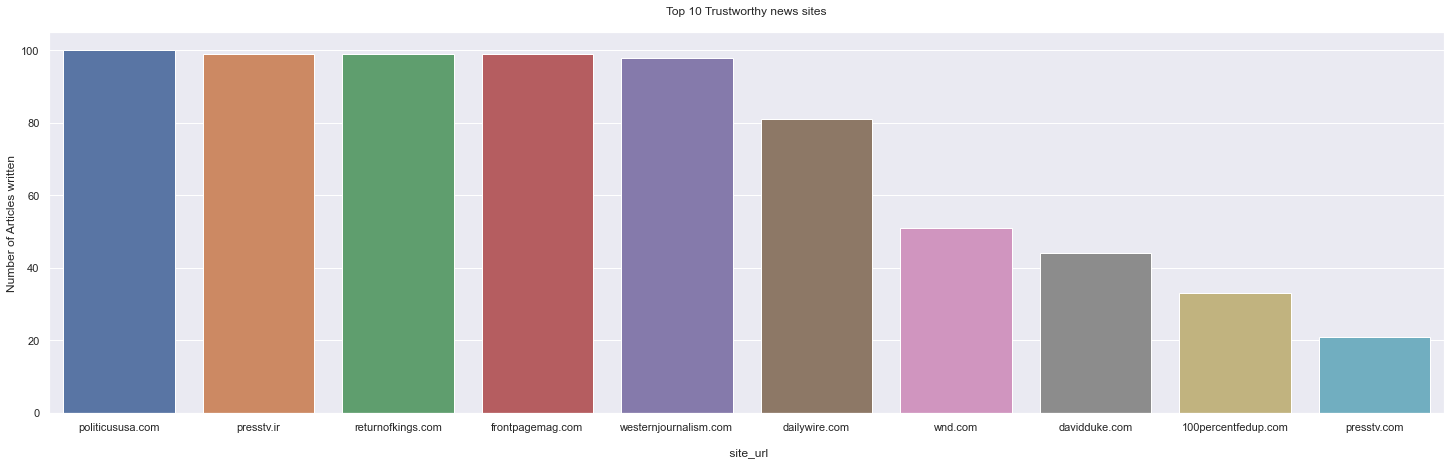

In [250]:
#Visualise the top 10 real news site
# dataframe with top 10 Trustworthy news site
df1 = data[data['label'] == 'Real']['site_url'].value_counts().sort_values(ascending=False).head(10)
df1 = pd.DataFrame(df1)
df1 = df1.reset_index() 

# Plotting
sns.set()
plt.figure(figsize=(25,7))
sns.barplot(x='index', y='site_url', data=df1)
plt.xlabel("\n site_url")
plt.ylabel("Number of Articles written")
plt.title("Top 10 Trustworthy news sites\n")
plt.show()

In [251]:
# Websites publishing fake news
uniqueValues_fake = list(OrderedDict.fromkeys(val_fake)) 
print(f"{y_}Websites publishing fake news:{r_}{uniqueValues_fake}\n")

Websites publishing fake news:['21stcenturywire.com', 'abcnews.com.co', 'abeldanger.net', 'abovetopsecret.com', 'activistpost.com', 'adobochronicles.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'awdnews.com', 'barenakedislam.com', 'clickhole.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.com', 'dcclothesline.com', 'defenddemocracy.press', 'dennismichaellynch.com', 'departed.co', 'der-postillon.com', 'fromthetrenchesworldreport.com', 'frontpagemag.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'intrepidreport.com', 'legorafi.fr', 'madworldnews.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com', 'projectveritas.com', 'returnofkings.com', 'shiftfrequency.com', 'thedailysheeple.com', 'theeconomiccollapseblog.com', 'thefreethoughtproject.com',

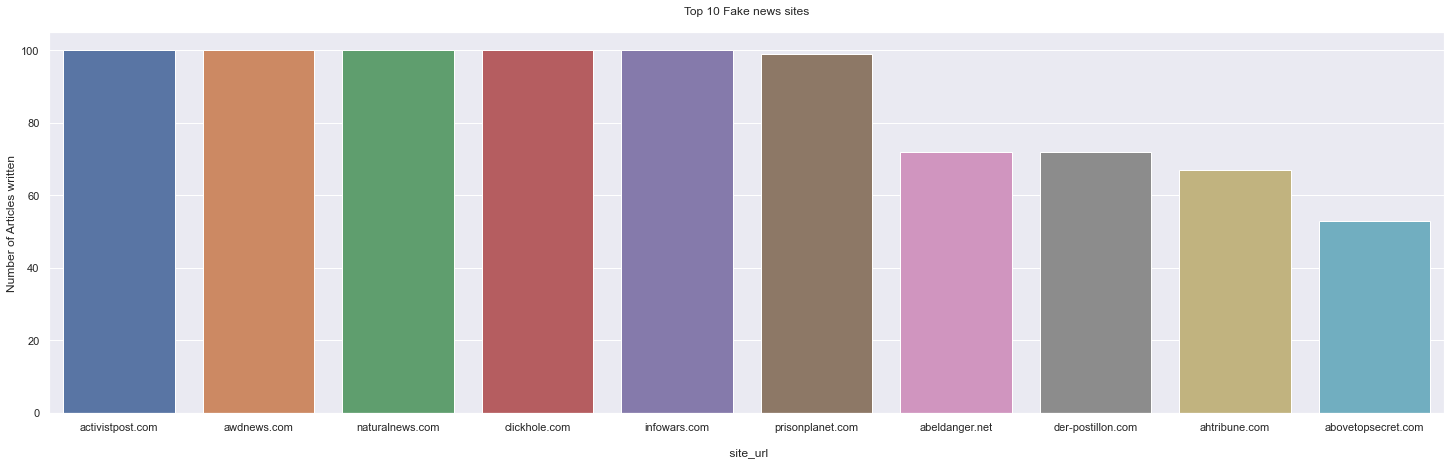

In [252]:
#Visualise the top 10 fake news site
# dataframe with top 10 fake news site
df1 = data[data['label'] == 'Fake']['site_url'].value_counts().sort_values(ascending=False).head(10)
df1 = pd.DataFrame(df1)
df1 = df1.reset_index() 

# Plotting
sns.set()
plt.figure(figsize=(25,7))
sns.barplot(x='index', y='site_url', data=df1)
plt.xlabel("\n site_url")
plt.ylabel("Number of Articles written")
plt.title("Top 10 Fake news sites\n")
plt.show()

In [253]:
#Websites publishing both real and fake news
real_set = set(uniqueValues_real) 
fake_set = set(uniqueValues_fake) 

print(f"{y_}Websites publishing both real and fake news:{m_}{real_set & fake_set}\n")

Websites publishing both real and fake news:{'frontpagemag.com', 'prisonplanet.com', 'newstarget.com', 'washingtonsblog.com', 'davidduke.com', 'returnofkings.com', 'fromthetrenchesworldreport.com', 'presstv.ir', 'westernjournalism.com'}



from above we can see that most of type website that publish fake news and what website that publish both (fake and news) on their website.

Now we try to see in depth the 8 type of articles:

In [254]:
#define the type 
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
data.type = [type1[item] for item in data.type] 


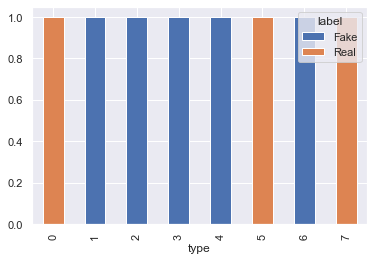

In [255]:
#Label vs Type
def plot_bar(data, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(data[feat_x], data[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

plot_bar(data,'type' , 'label')
plt.show()

from here we can see that real only bias, hate and state as real news, and the rest are hoax.

In [256]:
#Websites and types of news published
#define the dataset
df_type = data[['site_url','type']]

val_bias=[]
val_conspiracy=[]
val_fake1=[]
val_bs=[]
val_satire=[]
val_hate=[]
val_junksci=[]
val_state=[]
{'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
#iterate the type of articles
for i,row in df_type.iterrows():
    val = row['site_url']
    if row['type'] == 0:
        val_bias.append(val)
    elif row['type']== 1:
        val_conspiracy.append(val)
    elif row['type']== 2:
        val_fake1.append(val)
    elif row['type']== 3:
        val_bs.append(val)
    elif row['type']== 4:
        val_satire.append(val)
    elif row['type']== 5:
        val_hate.append(val)
    elif row['type']== 6:
        val_junksci.append(val)
    elif row['type']== 7:
        val_state.append(val)

In [257]:
#
uv_bias = list(OrderedDict.fromkeys(val_bias)) 
uv_conspiracy = list(OrderedDict.fromkeys(val_conspiracy)) 
uv_fake = list(OrderedDict.fromkeys(val_fake1)) 
uv_bs = list(OrderedDict.fromkeys(val_bs)) 
uv_satire = list(OrderedDict.fromkeys(val_satire)) 
uv_hate = list(OrderedDict.fromkeys(val_hate)) 
uv_junksci = list(OrderedDict.fromkeys(val_junksci)) 
uv_state = list(OrderedDict.fromkeys(val_state)) 

print(f"{b_}{type1}\n")
i=0
for lst in (uv_bias,uv_conspiracy,uv_fake,uv_bs,uv_satire, uv_hate,uv_junksci,uv_state): 
    print(f"{y_}Source URLs for type:{b_}{i}{r_}{lst}\n") 
    i+=1

{'bias': 0, 'conspiracy': 1, 'fake': 2, 'bs': 3, 'satire': 4, 'hate': 5, 'junksci': 6, 'state': 7}

Source URLs for type:0['100percentfedup.com', 'addictinginfo.org', 'dailywire.com', 'newstarget.com', 'politicususa.com', 'prisonplanet.com', 'proudemocrat.com', 'washingtonsblog.com', 'westernjournalism.com', 'whydontyoutrythis.com', 'wnd.com']

Source URLs for type:1['21stcenturywire.com', 'activistpost.com', 'awdnews.com', 'galacticconnection.com', 'globalresearch.ca', 'infowars.com', 'naturalnews.com', 'newstarget.com', 'presstv.ir', 'prisonplanet.com']

Source URLs for type:2['abcnews.com.co', 'adobochronicles.com']

Source URLs for type:3['abeldanger.net', 'abovetopsecret.com', 'ahtribune.com', 'allnewspipeline.com', 'americannews.com', 'americasfreedomfighters.com', 'amren.com', 'amtvmedia.com', 'barenakedislam.com', 'coasttocoastam.com', 'corbettreport.com', 'countercurrents.org', 'counterpunch.org', 'darkmoon.me', 'davidduke.com', 'davidstockmanscontracorner.com', 'davidwolfe.co

From above we can see in detail the sources of url for each type of articles.

4. DATA PREPROCESSING FOR MODEL

Now we need to shuffling the data

In [258]:
#Let's reshuffle the dataset
df2 = data.sample(frac = 1)

#taking the features
features = df2[['site_url', 'text_without_stopwords']]
features.head(10)



,site_url,text_without_stopwords
162,abovetopsecret.com,trumps hollywood walk fame star destroyed sled...
1727,returnofkings.com,socalled intellectuals harm good society socal...
1173,infowars.com,usled coalition killed civilians air strikes s...
475,amtvmedia.com,hillary clinton lead day election day press tv...
983,der-postillon.com,dienstag november flitzer auf dem spielfeld sc...
6,100percentfedup.com,breaking nypd ready make arrests weiner casehi...
890,dcclothesline.com,project veritas project veritas action release...
40,21stcenturywire.com,st century wire says amid great mainstream med...
1993,whydontyoutrythis.com,left field gingrich slutshames megyn kelly ade...
1309,naturalnews.com,keywords election rigged election voting votin...


In [259]:
features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

features.head()

,url_text
162,abovetopsecret.com trumps hollywood walk fame ...
1727,returnofkings.com socalled intellectuals harm ...
1173,infowars.com usled coalition killed civilians ...
475,amtvmedia.com hillary clinton lead day electio...
983,der-postillon.com dienstag november flitzer au...


In [275]:
#Define the X and Y
y = df2.type
x = df2.loc[:,['site_url','text_without_stopwords']]
x['source'] = x["site_url"].astype(str) +" "+ x["text_without_stopwords"] 
x = x.drop(['site_url','text_without_stopwords'],axis=1)
x = x.source



Right after preprocessing, the output is a corpus of raw texts that are stripped of stopwords, stemmed and lemmatized. 

In order to get a sparse matrix of TF/IDF values, the following steps are taken:
* Tokenization of texts
* Counting of the tokens and
* Transforming the raw tokens into TF/IDF values

The above steps are done with the help of the TfidfVectorizer, which transforms text to feature vectors that can be used
as input to estimators/classifiers.

In [276]:
#split dataset train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = 'english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

tfidf_train = pd.DataFrame(X_train_tfidf.A, columns = tfidf_vectorizer.get_feature_names())
#tf-idf matrix
tfidf_train.head()

,100percentfedup,21stcenturywire,___,aa,aab,aadmi,aah,aaja,aali,aaliya,aaliyas,aam,aand,aap,aaps,aaron,aas,ab,aba,aback,abajo,abandon,abandoned,abandoning,abandonment,abandons,abated,abb,abbas,abbatoir,abbekommen,abbey,abbott,abbotts,abbreviated,abby,abc,abccbsfoxyounameit,abcdisney,abcnews,abcpolitics,abcs,abd,abdel,abdelghafour,abdelmoumen,abdelrahman,abdelwahhab,abdicate,abdirahman,abdomen,abdominal,abdrabbuh,abducted,abducting,abduction,abdul,abdulazeez,abdulaziz,abdullah,abdulmalik,abe,abedin,abedins,abel,abeldanger,abeldangernet,abend,abends,abenteuerlustige,aber,abernethy,aberrant,aberration,abets,abetted,abetting,abgedecktes,abgefunden,abgelegenen,abgelehnt,abgeschotteten,abgesichert,abgesprochen,abgesucht,abgewickelt,abgewinnen,abholen,abhorrent,abhors,abhängig,abide,abideen,abides,abiding,abierto,abilities,ability,abiturient,abject,abkommens,ablauf,ablaze,able,ableben,ableism,ably,abnormalities,aboard,abolish,abolished,abolishing,abolishment,abolition,abominable,abomination,aborigines,abort,aborted,abortifacients,abortion,abortionist,abortions,abotsway,abounding,aboutas,aboutface,aboveaforementioned,abovementioned,aboveto,abovetopsecret,abracadab,abraham,abramovic,abramovics,abramowitz,abrams,abreast,abril,abrir,abrissfirma,abroad,abrupt,abruptly,absage,abscess,abschließend,abschreckend,abschätzbar,abschätzen,abscond,abseits,absence,absent,absentee,absentia,absichtlich,absitzen,absolut,absolute,absolutely,absoluter,absolutes,absolve,absorb,absorbable,absorbed,absorbing,absorbs,absorption,abstain,abstained,abstaining,abstention,abstentionism,abstentions,abstract,abständen,absurd,absurdities,absurdity,absurdly,absägt,abt,abtreibungsklinik,abtreten,abu,abundance,abundant,abundantly,abuse,abused,abuser,abusers,abuses,abusing,abusive,abysmal,abyss,ac,aca,acab,academe,academia,academiato,academic,academically,academicians,academics,academicsacademics,academy,acai,accelerate,accelerated,accelerationforcemass,accent,accentuated,accept,acceptability,acceptable,acceptance,accepted,acceptedwhile,accepting,accepts,access,accessed,accessible,accessing,accession,accessories,accessory,accident,accidental,accidentally,accidents,acclaimed,accommodate,accommodating,accommodation,accommodative,accomodate,accompanied,accompanies,accompany,accompanying,accomplices,accomplish,accomplished,accomplishes,...,zarif,zarqawi,zart,zatanique,zatzman,zaubertrank,zawa,zeal,zealand,zealands,zealots,zeaxanthin,zebra,zehn,zehns,zehnten,zeichen,zeichnen,zeichner,zeifman,zeigen,zeigt,zeigten,zeit,zeitgeist,zeitlosen,zeitpunkt,zeitumstellon,zeitumstellung,zeitungsannoncen,zeitweise,zeke,zelle,zemin,zenith,zensuren,zerfetzt,zerknirscht,zero,zeroed,zerohedgecom,zerohour,zerstören,zerstörenden,zerstörung,zervos,zeug,zeugnis,zhang,zhou,ziehe,zieht,ziel,ziemlich,zigarettenpause,zigbee,zigzag,zika,zikarelated,zimbabwe,zimmer,zimmerarrest,zinc,zineb,zinns,zio,ziocommies,zion,zionism,zionismracism,zionist,zionistic,zionists,zionistshave,zip,zipped,ziptied,zivilisation,zize,zog,zogen,zola,zollstock,zombie,zombies,zone,zones,zonked,zoo,zoological,zoologists,zoology,zoom,zoomed,zoos,zou,zsl,zsls,zu,zuchthaus,zucken,zucker,zuckerberg,zuckerbergs,zudem,zudrehte,zufolge,zufrieden,zufällig,zufügen,zug,zuge,zugehörigkeit,zugeschraubt,zugesehen,zugeständnis,zugewiesen,zugriff,zuhört,zuklappen,zukunft,zuletzt,zulu,zulus,zulutiming,zum,zuma,zumas,zungen,zunächst,zupacken,zur,zurzeit,zurück,zurückgreifen,zurückhalten,zurückhaltung,zurückkommt,zusah,zusammen,zusammenarbeit,zusammengekratzt,zusammenreißen,zusammenzupacken,zuschauer,zuschraubt,zustand,zustandekommen,zustimmung,zuständigen,zusätzlich,zusätzlichen,zuvor,zwang,zwar,zwei,zweifelsfall,zweiten,zweiter,zweitere,zweiwöchigen,zwielichtige,zwingen,zwingt,zwischen,zwischenlagern,zwo,zwölf,zylinderkopfdichtung,zz,zölibat,zündende,zünftige,áfrica,ámbitos,área,äh,ähnlich,ähnliche,älterer,ändern,ändert,änderung,ärger,ärzte,äußerst,äußert,äußerung,äußerungen,ça,écarter,économique,également,égard,élite,émergentes,émergents,épo

5. BASIC MODEL BUILDING

In [277]:
#Create the basic model
tfidf_vectorizer
#find the shape
tfidf_train.shape

(1424, 39069)

AdaBoost works in iterations with a base classifier to ensure accurate predictions of unusual observations.

It works in iterations and within each iteration, incorrect observations are given a higher probability for classification for the next iteration. 

The AdaBoost implemented here has a Decision Tree Classifier as the base classifier with a max depth of the tree being 10.

In [278]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(X_test_tfidf)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.961


the accuracy use decision tree showed 96.1%

In [279]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(X_test_tfidf)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)

accuracy:  0.853


the accuracy use random forest are low than decision tree which are 85.3%